In [13]:
import os
import re 
import gym
import tensorflow as tf
import numpy as np
from stable_baselines import DQN
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines.deepq.policies import LnMlpPolicy
from stable_baselines.common.evaluation import evaluate_policy
#from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise


In [14]:
env_name = 'LunarLander-v2'


In [15]:
env = gym.make(env_name)
env = DummyVecEnv([lambda: env])
tf.compat.v1.get_default_session()

In [16]:
filenames = []
for zipFilename in os.listdir('.'):
    if not zipFilename.endswith('.zip'):
        continue 
    filenames.append(zipFilename)
    

In [17]:
def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)

In [18]:
li = []
for x in sorted_nicely(filenames):
    li.append(x)


In [19]:
# avg_scores = []
# for i in range (0,len(li)):
#     model = DQN.load(li[i], env = env)
#     obs = env.reset()

#     episodes = 10
#     total_score =0
    
#     for episode in range(1,episodes-1):
#         state = env.reset()
#         done = False
#         score = 0
    
#         while not done:
#             #env.render()
#             action, _states = model.predict(obs) 
#             obs, reward, done, info = env.step(action)
#             score+= reward
#             total_score+=reward
        
#         print('Episode:{} Score{}'.format(episode,score))
               
    
#     print("avg score", str(total_score/episode))
# avg_scores.append(total_score/episode) 
# print(avg_scores)
# env.close() 

In [20]:
average_values = []
for i in range(0,len(li)):
    model = DQN.load(li[i], env = env)
    obs = env.reset()

    episodes = 10
    total_score =0
    
    for episode in range(1,episodes-1):
        state = env.reset()
        done = False
        score = 0
        while not done:
            #env.render()
            action, _states = model.predict(obs) 
            obs, reward, done, info = env.step(action)
            score+= reward
            total_score+=reward
           
        print('Episode:{} Score{}'.format(episode,score))      
    for i in range(1,episode-1):
        average = total_score/episode
        average_values.append(average)
    print("avg score", str(total_score/episode))
    

Episode:1 Score[256.38153]
Episode:2 Score[241.38335]
Episode:3 Score[-42.447144]
Episode:4 Score[217.50339]
Episode:5 Score[-94.60146]
Episode:6 Score[242.9812]
Episode:7 Score[2.107544]
Episode:8 Score[-101.705154]
avg score [90.200386]
Episode:1 Score[276.77237]
Episode:2 Score[268.26172]
Episode:3 Score[309.42148]
Episode:4 Score[245.45638]
Episode:5 Score[280.2388]
Episode:6 Score[277.02792]
Episode:7 Score[312.5351]
Episode:8 Score[258.00348]
avg score [278.46466]
Episode:1 Score[300.12735]
Episode:2 Score[156.78691]
Episode:3 Score[48.72206]
Episode:4 Score[255.22295]
Episode:5 Score[159.75461]
Episode:6 Score[244.90408]
Episode:7 Score[267.50455]
Episode:8 Score[263.74594]
avg score [212.09596]
Episode:1 Score[286.6713]
Episode:2 Score[-3.867355]
Episode:3 Score[277.49597]
Episode:4 Score[232.41245]
Episode:5 Score[220.57623]
Episode:6 Score[301.8988]
Episode:7 Score[275.7456]
Episode:8 Score[78.72699]
avg score [208.7075]
Episode:1 Score[265.1973]
Episode:2 Score[258.21448]
Ep

In [21]:
average_values = [i.item() for i in average_values]


In [22]:
def f7(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]
    
f7(average_values)
#print(average_values)

[90.20038604736328,
 278.46466064453125,
 212.09596252441406,
 208.70750427246094,
 254.329345703125,
 218.88595581054688,
 -17.688400268554688,
 141.10594177246094,
 153.80938720703125,
 60.50304412841797,
 182.18643188476562,
 233.372802734375,
 167.6457061767578,
 271.4012145996094]

In [23]:
a = re.compile(r'\d+')
x = []
for i in range(0,len(li)):
    num = a.search(li[i])
    x.append(int(num.group()))


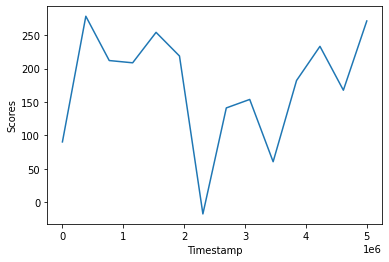

In [24]:
import matplotlib.pyplot as plt 
import numpy as np
z = np.linspace(0, 5000000,14)
plt.plot(z,f7(average_values))
plt.xlabel("Timestamp")
plt.ylabel("Scores")
plt.savefig("output6.jpg")
plt.show()

